In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [3]:
df = sns.load_dataset("penguins")

In [40]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [54]:
# preprocessing to get our labels
X = df[["flipper_length_mm", "bill_depth_mm"]].iloc[:220].values
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(df.iloc[:220].species == "Chinstrap", -1, 1)
y = np.delete(y, 3)

In [69]:
class Perceptron():
    def __init__(self, eta = 0.5, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1]) # creating a random weight vector for neuron initialization
        
        self.errors_ = [] # a list that will contain the misclassification errors we obtain while training
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi # updating the weights
                self.w_[-1] -= update # updating the bias
                errors += int(update != 0)
            self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1] # the weighted sum/input signal
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Perceptron Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()
        
        

In [64]:
percep = Perceptron(epochs = 1_000)
percep.train(X, y)

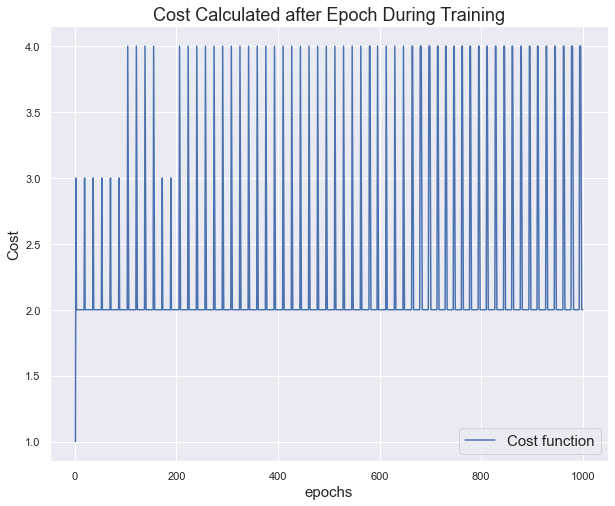

In [65]:
# plt.figure(figsize = (10, 8))
# plot_decision_regions(X, y, clf = percep)
# plt.title("Perceptron Model for the Palmer Penguins Dataset", fontsize = 18)
# plt.xlabel("flipper length [mm]")
# plt.ylabel("bill depth [g]")
# plt.show()

percep.plot_cost_function()
plt.show()

ValueError: Filled contours require at least 2 levels.

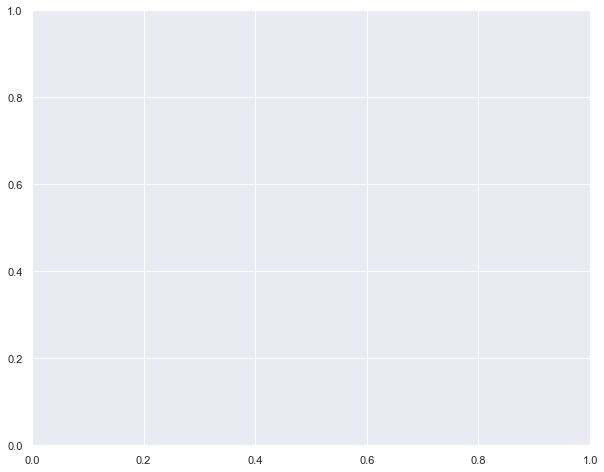

In [68]:
percep.plot_decision_boundary(X, y)
plt.show()